**Disciplina: ACA052 - Meteorologia Sinótica I**

Monitor: Ronald Guiuseppi Ramírez Nina

Ph.D. Student at Department of Atmospheric Sciences - Institute of Astronomy, Geophysics and Atmospheric Sciences - University of São Paulo, São Paulo, Brazil

File: Aula_03.ipynb

# **Radiossondagens com Python**

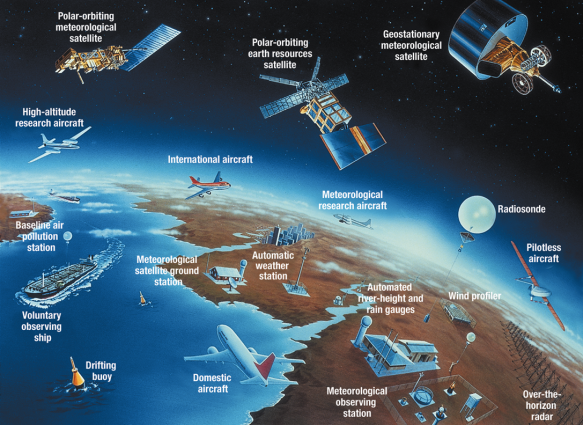

Os radiossondagens são parte do sistema mundial de observações meteorológicas. Uma radiossondagem está constituido por um conjunto de equipamentos e sensores transportado por balões meteorológicos. Os dados meteorológicos coletados por uma radiossondagem são os seguintes:
- Pressão
- Altura
- Temperatura
- Temperatura do ponto de orvalho
- Direção do vento
- Velocidade do vento
- Entre outras

Geralmente, os lançamentos dos radiossondagens são feitos nos aeródromos dos diferentes paises.

Com esses dados meteorológicos obtidos com as radiossondagens, nós vamos fazer diagramas termodinâmicos, como o **Skew-T Log-P**.

# **Objetivo**

- Plotar o diagrama Skew-T Log-P com dados obtidos de radiossondagem da base de dados da Universidade de Wyoming, utilizando Python (Colab).

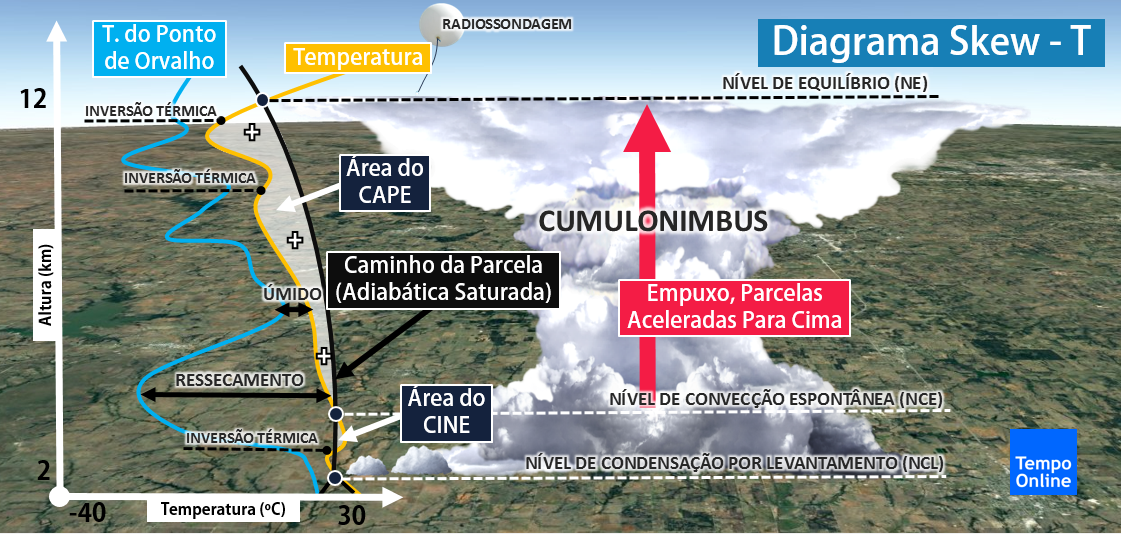

## **1. Pacote Siphon para acesso a dados de Radiossondagens**

O Siphon é um pacote com acesso a banco de dados meteorológicos de diferentes instituções. Os bancos de dados são os seguintes:

- Wyoming University
- National Data Buoy Center (NDBC)
- Integrated Global Radiosonde Archive version 2 (IGRA v2)
- Iowa State's upper air archive

Para atingir nosso objetivos, vamos a acessar ao banco de dados das radiossondagens da Wyoming University.


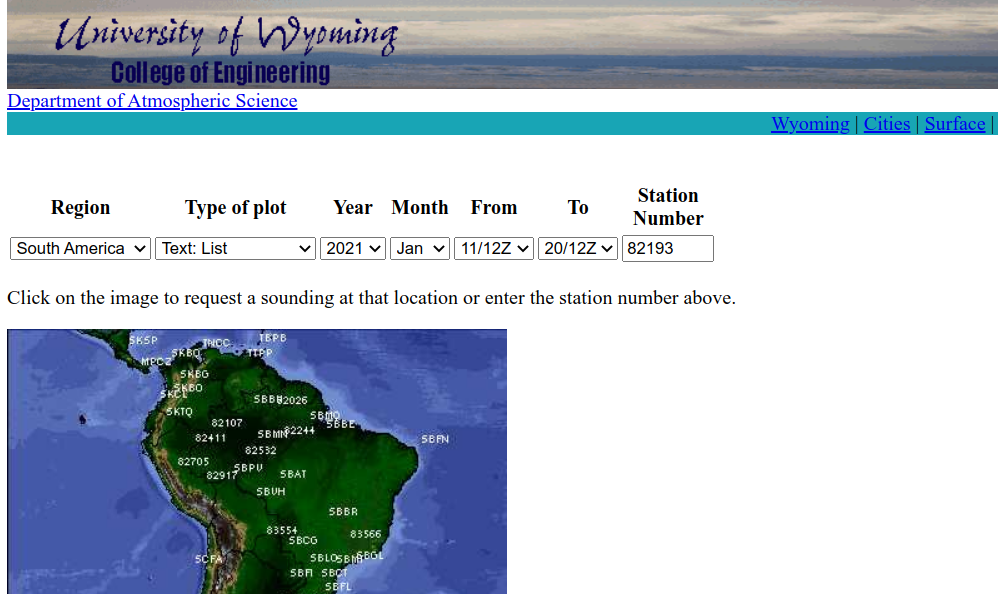

Instalação do pacote **siphon** no Colab (devido a que é um pacote externo)

O pacote **Metpy** é um pacote externo e portanto precisamos de instalar-lho.

**Nota:** A versão do Matplotlib 3.5.0 apresenta alguns conflitos com o **Metpy**. Para resolver esse problema, é necessário desinstalar o pacote **Matplotlib** (instalado por default) e instalar a **versão 3.3.0 do Matplotlib**.

1. Instalando as livrarias


In [ ]:
!pip install siphon
!pip install matplotlib==3.3.0
!pip install metpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.8/38.8 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.3.0-cp311-cp311-linux_x86_64.whl size=11709163 sha256=6412cce328d1d6235b34fa1724f45b9ebda5d0c6b6bcaa98b00654a12bdf6919
  Stored in directory: /root/.cache/pip/wheels/d3/8d/2e/08b92b49080c856cee0a8c378cde4a949608cf090d6835e78d
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.3.0 which is incompatible.
arviz 0.21.0 requires matplotlib>=3.5, but you h

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 18.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


Para ter certeza de que foi instalado bem a versão **Matplotlib=3.3.0** vamos a fazer um **Restart runtime**. Para isso vamos a seguir os seguintes passos:

- Clic no menú **Runtime**
- Clic na opção **Restart runtime**
- Não precisa executar de novo a célula da instalação anterior.

Com isso o código não deveria apresentar problemas na sua execução.

2. Para acessar à base de dados da Wyoming University, precisamos utilizar a classe **WyomingUpperAir** dentro do módulo **siphon.simplewebservice.wyoming**

In [ ]:
from siphon.simplewebservice.wyoming import WyomingUpperAir

Depois de importar a classe **WyomingUpperAir**, é possível acessar a qualque radiossondagem disponível no servidor da Wyoming University. Para isso, é necessário ter duas informações:
- Código da estação (e.g., Código OACI: SBBE (Belém), ou código SYNOP: 84628 (Lima - Peru))
- Data e Horário UTC do lançamento da radiossondagem.


3. Importando o pacote **datetime**. O pacote **datetime** é importante porque através dele vamos introduzir a data da radiossondagem para o **siphon**. Com a data e código da estação, podemos fazer uso da função **.request_data(data, código de estação)** para acessar a uma radiossondagem.

In [ ]:
from datetime import datetime

4. Para o seguinte exemplo, vamos acessar aos dados da radiossondagem da **estação de Belém (SBBE)** no dia 12 de Janeiro de 2022 ás 12 UTC:

In [ ]:
ano = int(input("Escrever o ano: "))
print('                              ')
mes = int(input("Escrever o mês: "))
print('                              ')
dia = int(input("Escrever o dia: "))
print('                              ')
hora = int(input("Escrever a hora: "))
print('                              ')
print('Elegir o tipo de código:')
print(" - OACI (e.g. SBBE (Belém)")
print(" - SYNOP (e.g. 84628 (Lima - Peru)")
codigo = input("Escrever o tipo de código: ")
if codigo == "OACI":
  estacao = input("Escrever o nome da estação " + f"({codigo}): ")
if codigo == "SYNOP":
  estacao = int(input("Escrever o nome da estação " f"({codigo}): "))
print('------------------------------------------------------------------------')

sbbe = WyomingUpperAir.request_data(datetime(year = ano, month = mes, day = dia, hour = hora), estacao)
sbbe

Escrever o ano: 2018
                              
Escrever o mês: 01
                              
Escrever o dia: 15
                              
Escrever a hora: 12
                              
Elegir o tipo de código:
 - OACI (e.g. SBBE (Belém)
 - SYNOP (e.g. 84628 (Lima - Peru)
Escrever o tipo de código: SYNOP
Escrever o nome da estação (SYNOP): 84628
------------------------------------------------------------------------


HTTPError: Error accessing http://weather.uwyo.edu/cgi-bin/sounding/?region=naconf&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1512&TO=1512&STNM=84628
Server Error ( 503: Sorry, the server is too busy to process your request.
Please try again later.
)

5. A variável **sbbe** é do tipo DataFrame do Pandas, contendo os dados da radiossondagem para a estação de Belém:

In [ ]:
sbbe.head()

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0    1011.0      16         26.4      24.6      120.0    3.0  -2.598076   
1    1000.0     116         25.4      23.4      100.0    3.0  -2.954423   
2     952.0     547         22.6      19.7       25.0   10.0  -4.226183   
3     925.0     799         21.0      17.6       45.0   14.0  -9.899495   
4     924.0     808         20.9      17.6       50.0   15.0 -11.490667   

     v_wind station  station_number                time  latitude  longitude  \
0  1.500000    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
1  0.520945    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
2 -9.063078    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
3 -9.899495    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
4 -9.641814    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   

   elevation     pw  
0       16.0  57.27  
1       16.0  57.27  
2       16.0  57.27  
3       16.0  57.27  
4       16.0  57.27

6. Olhando os nomes das colunas

In [ ]:
# Olhando os nomes das colunas
sbbe.columns

Index(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed',
       'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude',
       'longitude', 'elevation', 'pw'],
      dtype='object')

As variáveis da radiossondagem são as seguintes:

- Pressão (hPa)
- Altura (m)
- Temperatura (ºC)
- Temperatura do Ponto de orvalho (ºC)
- Direção do vento (º)
- Velocidade do vento (m/s)
- Componente zonal do vento (m/s)
- Componente meridional do vento (m/s)
- Código da estação
- Número de estação
- Data
- Latitude
- Longitude
- Elevação da estação (msnm)



7. No caso de ter dados faltantes no DataFrame, esses dados faltantes estão no formato **NaN**. Nesse caso, vamos eliminar essas filas do DataFrame para fazer os cálculos para o trazado do diagrama Skew-T Log-P.

In [ ]:
# Eliminando os dados faltantes do DataFrame <- NaN
sbbe = sbbe.dropna()
sbbe

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1011.0      16         26.4      24.6      120.0    3.0  -2.598076   
1     1000.0     116         25.4      23.4      100.0    3.0  -2.954423   
2      952.0     547         22.6      19.7       25.0   10.0  -4.226183   
3      925.0     799         21.0      17.6       45.0   14.0  -9.899495   
4      924.0     808         20.9      17.6       50.0   15.0 -11.490667   
..       ...     ...          ...       ...        ...    ...        ...   
74      49.0   20681        -69.4     -90.6      145.0    6.0  -3.441459   
75      48.0   20804        -69.4     -90.8      105.0   12.0 -11.591110   
76      44.0   21323        -69.2     -91.3       80.0   22.0 -21.665771   
77      40.2   21862        -68.9     -91.9       84.0   33.0 -32.819223   
78      32.0   23246        -63.2     -92.1       95.0   59.0 -58.775487   

      v_wind station  station_number                time  latitude  longitude  \
0   1.500000    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
1   0.520945    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
2  -9.063078    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
3  -9.899495    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
4  -9.641814    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
..       ...     ...             ...                 ...       ...        ...   
74  4.914912    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
75  3.105829    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
76 -3.820260    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
77 -3.449439    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   
78  5.142189    SBBE           82193 2022-01-12 12:00:00     -1.38     -48.48   

    elevation     pw  
0        16.0  57.27  
1        16.0  57.27  
2        16.0  57.27  
3        16.0  57.27  
4        16.0  57.27  
..        ...    ...  
74       16.0  57.27  
75       16.0  57.27  
76       16.0  57.27  
77       16.0  57.27  
78       16.0  57.27  

[79 rows x 15 columns]

# **2. MetPy**

Com os dados disponíveis em um DataFrame obtidos com o pacote **siphon** vamos utilizar-lhos com o usso do pacote **Metpy** para gerar o diagrama Skew-T Log-P. O pacote **Metpy** é mantido pelo UCAR/UNIDATA.

O pacote **Metpy** é um pacote externo e portanto precisamos de instalar-lho.

**Nota:** A versão do Matplotlib 3.5.0 apresenta alguns conflitos com o Metpy. Para resolver esse problema, é necessário desinstalar o pacote Matplotlib (instalado por default) e instalar a versão 3.3.0 do Matplotlib.

8. O **Metpy** apresenta o módulo **units** que tem como função associar a cada variável meteorológica da radiossondagem sua unidade de medição respectiva.

In [ ]:
from metpy.units import units

9. Registrando as unidades para cada variável meteorológica

In [ ]:
# Registrando unidades
pressure = sbbe['pressure'].values * units('hPa')
temperature = sbbe['temperature'].values * units('celsius')
dewpoint = sbbe['dewpoint'].values * units('celsius')
u_wind = sbbe['u_wind'].values * units('m/s')
v_wind = sbbe['v_wind'].values * units('m/s')

10. Agora as variáveis têm: suas magnitudes e unidades registradas. Dessa forma, o **Metpy** consegue trabalhar com esses dados.

In [ ]:
dewpoint

array([ 24.6,  23.4,  19.7,  17.6,  17.6,  17.3,  16.6,  15.9,  14.1,
         9.5,   5.3,   5.5,   6.4,   3.9,  -0.9,  -3. ,  -7.3, -14.1,
       -16.1, -22.3, -15.9, -24.9, -22.9, -23.2, -23.8, -24.8, -25. ,
       -26.3, -30.5, -34.5, -38.3, -43.7, -45.4, -46.3, -45.1, -42.5,
       -50.5, -44.9, -49.7, -49.5, -52.3, -53.1, -56.3, -56.8, -58.7,
       -60.8, -73.6, -75.5, -76.9, -78.1, -81.4, -84.1, -85.9, -87.2,
       -89.1, -88.7, -88. , -87.7, -90.1, -89.2, -89.1, -90.9, -90.2,
       -89.6, -89.2, -88.7, -88.8, -88.9, -88.9, -89.2, -89.5, -89.8,
       -90. , -90.5, -90.6, -90.8, -91.3, -91.9, -92.1]) <Unit('degree_Celsius')>

# **3. Diagrama Skew-T Log-P**

Com as variáveis com as unidades asignadas, está tudo pronto para poder gerar o diagrama Skew-T Log-P. O pacote **Metpy** tem o módulo **SkewT** na classe **metpy.plots** (e outros tipos de gráficos).

O **Metpy** também apresenta a classe **metpy.calc** que possui várias funções para o cálculo de parâmetros termodinâmicos.

11. Importando a livraria de Matplotlib e Metpy

In [ ]:
# Importar o matplotlib
import matplotlib.pyplot as plt
# Cálculos termodinâmicos
import metpy.calc as mpcalc
# Skew-T Log-P
from metpy.plots import SkewT
# Importar o numpy
import numpy as np

12. Com o **Numpy**, vamos criar um intervalo de níveis de pressão através da função **np.arange()** entre os níveis de 1000 hPa - 100 hPa.

In [ ]:
levels = np.arange(100, 1050, 50) * units('hPa') # mbar para as unidades de milibar

13. O intervalo de **levels** vai ser utilizado para filtrar os dados de vento para o diagrama Skew-T Log-P, mediante o uso do **mpcalc.resample_nn_1d()**.

In [ ]:
levels = mpcalc.resample_nn_1d(pressure, levels)

Então, o que precisamos fazer agora é repassar os levels para as variáveis pressure, u_wind, v_wind no momento de fazer o diagrama Skew-T Log-P

14. Para gerar os diagramas vamos a utilizar o pacote **SkewT.plot()**. Com esse pacote o eixo Y está na escala logarítmica.

In [ ]:
# Para o título do gráfico
nome = sbbe['station'][0]
dia = sbbe['time'][0]

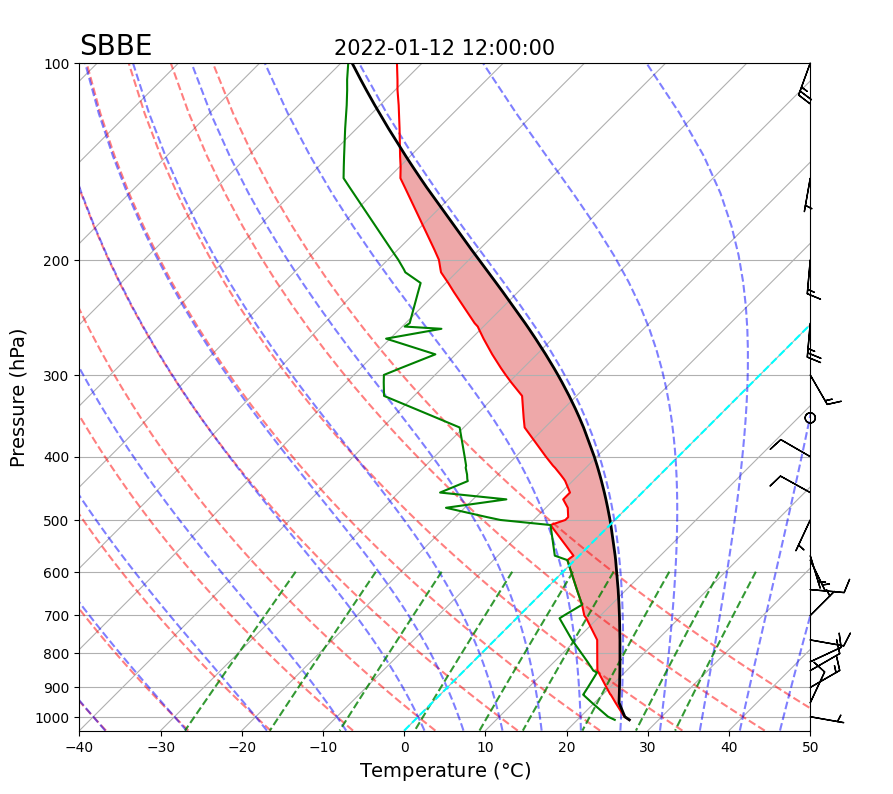

In [ ]:
# Criando a figura com o diagrama Skew-T Log-P

fig = plt.figure(figsize = (9,9))

skew = SkewT(fig, rotation = 45)

# Temperaturas e barbelas do vento
skew.plot(pressure, temperature, color = 'red')
skew.plot(pressure, dewpoint, color = 'green')
skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

# Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Calcular o perfil vertical da parcela de ar
perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
skew.plot(pressure, perfil, color = 'black', linewidth = 2)

# Cálculo do CAPE e CIN
skew.shade_cin(pressure, temperature, perfil, dewpoint)
skew.shade_cape(pressure, temperature, perfil)

# Diferenciar a isoterma de 0 ºC
skew.ax.axvline(0, color = 'cyan', linestyle = '--')

# Formatando os eixos e título
plt.xlabel(r'Temperature ($\degree$C)', fontsize = 14)
plt.ylabel(r'Pressure (hPa)', fontsize = 14)
plt.title(f'{nome}', fontsize = 20, loc = 'left')
plt.title(f'{dia}', fontsize = 15, loc = 'center')

plt.tight_layout()
plt.show()

# **4. Adicionar a hodógrafa e parâmetros termodinâmnicos utilizando o MetPy**

Dentro das funções do **Metpy** está a criação de **Hodográfas**, que é um gráfico que representa o movimiento de um fluído. Quando os diagrama Skew-T Log-P são combinados com a hodógrafa, características da atmósfera como o cisalhamento do vento são possíveis de analisar.

15. Para isso vamos a importar a classe **Hodograph**.

In [ ]:
from metpy.plots import Hodograph

16. Instalando o módulo **Gridspec** dentro do pacote **Matplotlib** para especificar a geometria dos subplots.

Importando o módulo **Gridspec**

In [ ]:
import matplotlib.gridspec as gridspec

O **metpy.calc** tem a capacidade de fazer vários cálculos meteorológicas nas áreas de: termodinâmica, dinâmica, sinótica e outros. Para ver um pouco mais, ler a documentação - "https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html".

Agora, vai ser feito o cálculo de parâmetros termodinâmicos para adicionar essas informações no diagrama Skew-T Log-P, junto à hodográfa.

18. **Lifted Condensation Level (LCL):** A função **mpcalc.lcl( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])

19. **Level of Free Convection (LFC):** A função **mpcalc.lfc( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
lfc_pressure, lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)

20. **Equilibrium Level (EL):** A função **mpcalc.lfc( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
el_pressure, el_temperature = mpcalc.el(pressure, temperature, dewpoint)

21. **Surface-Based Convective Available Potential Energy (SBCAPE) e Surface-Based Convective Inhibition (SBCIN):** A função **surface_based_cape_cin( )**. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -.

O **mpcalc** também faz o cálculo do CAPE e CIN convencionais e algumas variações. Ler a documentação: "https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html"

In [ ]:
sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)

22. **Precipitable water:** A função **mpcalc.precipitable_water( )** faz esse cálculo. Os inputs são os seguintes - pressão e temperatura de orvalho -

In [ ]:
precipitable_water = mpcalc.precipitable_water(pressure, dewpoint)

23. **Showalter Index:** A função **mpcalc.showalter_index( )** faz esse cálculo. Os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
showalter = mpcalc.showalter_index(pressure, temperature, dewpoint)

24. **Lifted Index:** A função **mpcalc.lifted_index( )** faz esse cálculo. os inputs são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
lifted = mpcalc.lifted_index(pressure, temperature, perfil)

25. **K Index:** A função **mpcalc.k_index( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
k_index = mpcalc.k_index(pressure, temperature, dewpoint)

26. **Vertical Total Index:** A função **mpcalc.vertical_totals( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura -

In [ ]:
vt = mpcalc.vertical_totals(pressure, temperature)

27. **Cross Total Index:** A função **mpcalc.cross_totals( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
ct = mpcalc.cross_totals(pressure, temperature, dewpoint)

28. **Total Totals Index:** A função **mpcalc.total_totals( )** faz esse cálculo. Os parâmentros de entrada são os seguintes - pressão, temperatura e temperatura do ponto de orvalho -

In [ ]:
tt = mpcalc.total_totals_index(pressure, temperature, dewpoint)

29. Adicionado ao diagrama Skew-T Log-P a hodógrafa e os parâmetros termodinâmicos

Montando o drive para acesso aos dados e salvar as figuras
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Terminou de ler os pacotes
                              
Escrever seu nome:Ronald
                              
------------------------------------------------------------------------


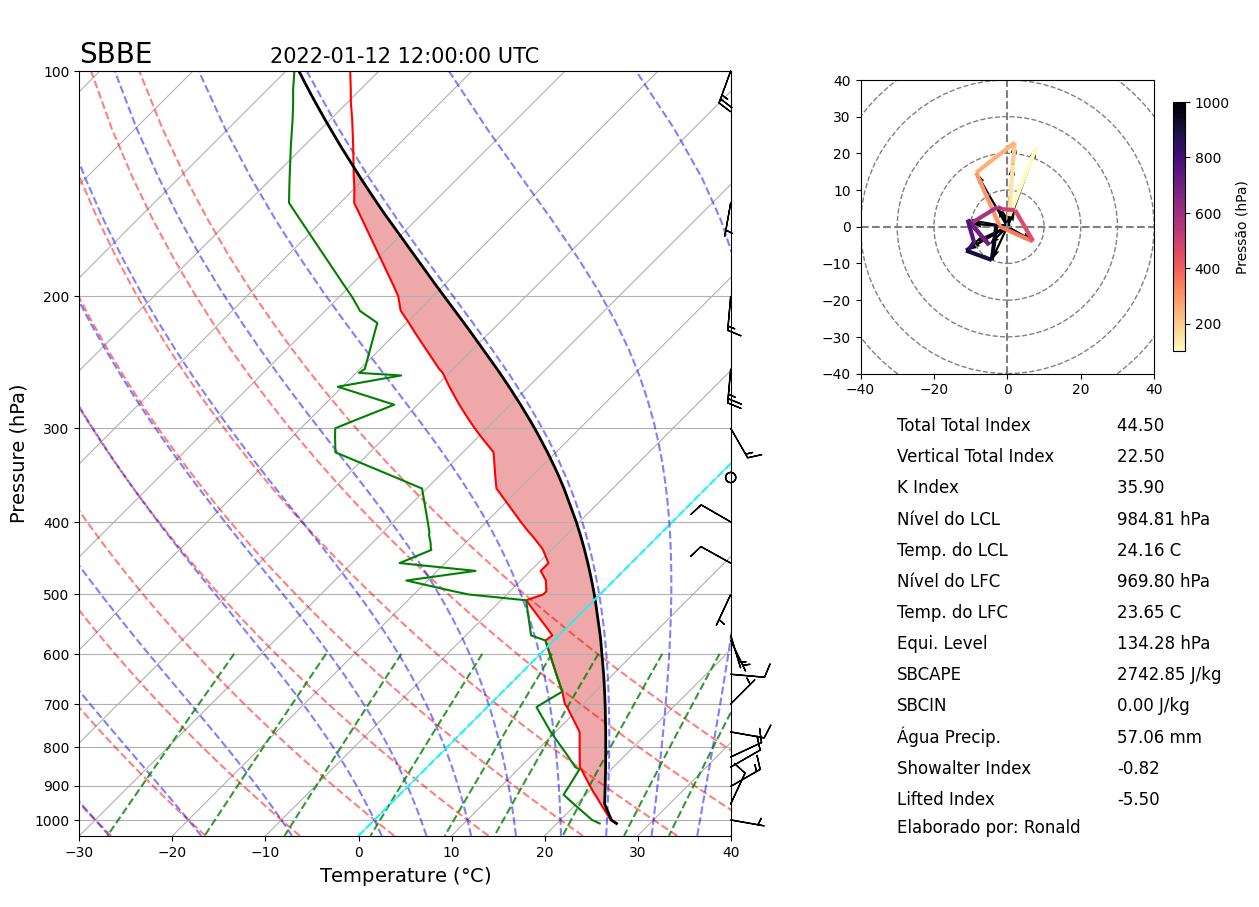

In [ ]:
# Montando o drive para salvar e acessar aos dados
print("Montando o drive para acesso aos dados e salvar as figuras")
from google.colab import drive
drive.mount('/content/drive')
print("Terminou de ler os pacotes")
print('                              ')

# Escrever o nome da sua pasta
Autor = input("Escrever seu nome:")
print('                              ')
print('------------------------------------------------------------------------')


# Criando a figura com o diagrama Skew-T Log-P

fig = plt.figure(figsize = (13,13))

# Utilizando a função gridspec para configurar o gráfico
gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation = 45, subplot = gs[0:2, :2])

# Adicionado temperaturas e barbelas do vento
skew.plot(pressure, temperature, color = 'red')
skew.plot(pressure, dewpoint, color = 'green')
skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

# Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Calcular e adicionar o perfil da parcela de ar
perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
skew.plot(pressure, perfil, color = 'black', linewidth = 2)

# Adicionando o CAPE e CIN
skew.shade_cin(pressure, temperature, perfil, dewpoint)
skew.shade_cape(pressure, temperature, perfil)

# Destacar a isoterma de 0 ºC
skew.ax.axvline(0, color = 'cyan', linestyle = '--')

# Ajustar o Skew-T Log-P
skew.ax.set_xlim(-30,40)

# Formatando os eixos
plt.xlabel(r'Temperature ($\degree$C)', fontsize = 14)
plt.ylabel(r'Pressure (hPa)', fontsize = 14)
plt.title(f'{nome}', fontsize = 20, loc = 'left')
plt.title(f'{dia} UTC', fontsize = 15, loc = 'center')

# -------------------------------------------------------------------------------------------
# HODÓGRAFA

# Agregar hodógrafo
ax = fig.add_subplot(gs[0:1, -1])
hodografo = Hodograph(ax, component_range=80.)
hodografo.add_grid(increment=10)
hodografo.wind_vectors(u_wind[levels], v_wind[levels])
niveis_cores = hodografo.plot_colormapped(u_wind[levels], v_wind[levels], pressure[levels], cmap='magma_r')

# Agregar a barra de cores para os níveis do vetor vento
fig.colorbar(niveis_cores, orientation='vertical', label='Pressão (hPa)', shrink = 0.8)

# colocar limites em x e y
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

# --------------------------------------------------------------------------------------------
# ADICIONAR OS PARÂMETROS TERMODINÂMICOS

# Agregar parâmetros termodinâmicos
ax3 = fig.add_subplot(gs[1, -1])
ax3.axis('off')

# coluna 1
ax3.text(0.1, 1.4,' ', size = 12)
ax3.text(0.1, 1.3,'Total Total Index', size = 12)
#ax3.text(0.1, 1.3,'Cross Total Index', size = 12)
ax3.text(0.1, 1.2,'Vertical Total Index', size = 12)
ax3.text(0.1, 1.1,'K Index', size = 12)
ax3.text(0.1, 1,'Nível do LCL', size = 12)
ax3.text(0.1, 0.9,'Temp. do LCL', size = 12)
ax3.text(0.1, 0.8,'Nível do LFC', size = 12)
ax3.text(0.1, 0.7,'Temp. do LFC', size = 12)
ax3.text(0.1, 0.6,'Equi. Level', size = 12)
ax3.text(0.1, 0.5,'SBCAPE', size = 12)
ax3.text(0.1, 0.4,'SBCIN', size = 12)
ax3.text(0.1, 0.3,'Água Precip.', size = 12)
ax3.text(0.1, 0.2,'Showalter Index', size = 12)
ax3.text(0.1, 0.1,'Lifted Index', size = 12)

# coluna 2
ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(tt)), size = 12)
#ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(ct)), size = 12)
ax3.text(0.7, 1.2, '{:.2f} '.format(np.array(vt)), size = 12)
ax3.text(0.7, 1.1, '{:.2f} '.format(np.array(k_index)), size = 12)
ax3.text(0.7, 1, '{:.2f} hPa'.format(np.array(lcl_pressure)), size = 12)
ax3.text(0.7, 0.9, '{:.2f} C'.format(np.array(lcl_temperature)), size = 12)
ax3.text(0.7, 0.8, '{:.2f} hPa'.format(np.array(lfc_pressure)), size = 12)
ax3.text(0.7, 0.7, '{:.2f} C'.format(np.array(lfc_temperature)), size = 12)
ax3.text(0.7, 0.6, '{:.2f} hPa'.format(np.array(el_pressure)), size = 12)
ax3.text(0.7, 0.5, '{:.2f} J/kg'.format(np.array(sbcape)), size = 12)
ax3.text(0.7, 0.4, '{:.2f} J/kg'.format(np.array(sbcin)), size = 12)
ax3.text(0.7, 0.3, '{:.2f} mm'.format(np.array(precipitable_water)), size = 12)
ax3.text(0.7, 0.2, '{:.2f}'.format(np.array(showalter)[0]), size = 12)
ax3.text(0.7, 0.1, '{:.2f}'.format(np.array(lifted)[0]), size = 12)
ax3.text(0.1, 0.01, 'Elaborado por: ' + f'{Autor}', size = 12)

plt.tight_layout()
plt.show()

# Salvando o plot
fig.savefig('/content/drive/MyDrive/USP-CURSOS/MONITORIA/Meteorologia-Sinotica-I/Aula-3/radiossondagem.png',\
            format='png', dpi = 300)

## **5. ATIVIDADE**

30. Para facilitar a elaboração do diagrama Skew-T Log-P, vamos criar uma função que vai fazer todos os passos necessários para a obtenção de uma figura com o diagrama Skew-T Log-P, a hodógrafa e os parâmetros termodinâmicos.

In [ ]:
def skewt_logp(sondagem, seu_nome):

  # Eliminar os dados faltantes do radiossondagem
  sondagem = sondagem.dropna()

  # Adicionar unidades de medição as variáveis meteorológicas
  pressure = sondagem['pressure'].values * units('hPa')
  temperature = sondagem['temperature'].values * units('celsius')
  dewpoint = sondagem['dewpoint'].values * units('celsius')
  u_wind = sondagem['u_wind'].values * units('m/s')
  v_wind = sondagem['v_wind'].values * units('m/s')

  # Fazer un resample aos níveis de pressão para plotar os ventos
  levels = np.arange(100, 1050, 50) * units('hPa')
  levels = mpcalc.resample_nn_1d(pressure, levels)

  # ---------------------------------------------------------------------------

  # Criando a figura

  fig = plt.figure(figsize=(12, 12))

  # Asignando o nome da estação e a data
  nome = sondagem['station'][0]
  dia = sondagem['time'][0]

  # Utilizando a função gridspec para configurar o gráfico
  gs = gridspec.GridSpec(3, 3)
  skew = SkewT(fig, rotation=45, subplot=gs[0:2, :2])

  # Adicionado temperaturas e barbelas do vento
  skew.plot(pressure, temperature, color='red',)
  skew.plot(pressure, dewpoint, color='green')
  skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb=True)

  # Adicionando as curvas das adiabáticas e razão de mistura no Skew-T Log-P
  skew.plot_dry_adiabats()
  skew.plot_moist_adiabats()
  skew.plot_mixing_lines()

  # Calcular e adicionar o perfil da parcela de ar
  perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
  skew.plot(pressure, perfil, color='black', linewidth=2)

  # Adicionar o CAPE e o CIN
  skew.shade_cin(pressure, temperature, perfil, dewpoint)
  skew.shade_cape(pressure, temperature, perfil)

  # Destacar a isoterma de 0 ºC
  skew.ax.axvline(0, color='cyan', linestyle='--')

  # Ajustar o diagrama Skew-T Log-P
  skew.ax.set_xlim(-30, 40)

  # Calcular os parâmetros termodinâmicos para ser adicionados ao diagrama Skew-T Log-P
  lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
  lfc_pressure, lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)
  el_pressure, el_temperature = mpcalc.el(pressure, temperature, dewpoint)
  sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)
  precipitable_water = mpcalc.precipitable_water(pressure, dewpoint)
  showalter = mpcalc.showalter_index(pressure, temperature, dewpoint)
  lifted = mpcalc.lifted_index(pressure, temperature, perfil)

  # Formatando os eixos do diagrama Skew-T Log-P
  plt.xlabel(r'Temperature ($\degree$C)', fontsize=14)
  plt.ylabel(r'Pressure (hPa)', fontsize=14)
  plt.title(f'{nome}', fontsize=20, loc='left')
  plt.title(f'{dia} UTC', fontsize=15, loc='center')

  # -------------------------------------------------------------------------------------------
  # HODÓGRAFA

  # Agregar hodógrafo
  ax = fig.add_subplot(gs[0:1, -1])
  hodografo = Hodograph(ax, component_range=80.)
  hodografo.add_grid(increment=10)
  hodografo.wind_vectors(u_wind[levels], v_wind[levels])
  niveis_cores = hodografo.plot_colormapped(u_wind[levels], v_wind[levels], pressure[levels], cmap='magma_r')

  # Agregar a barra de cores para os níveis do vetor vento
  fig.colorbar(niveis_cores, orientation='vertical', label='Pressão (hPa)', shrink = 0.8)

  # colocar limites em x e y
  ax.set_xlim(-40, 40)
  ax.set_ylim(-40, 40)

  # --------------------------------------------------------------------------------------------
  # ADICIONAR OS PARÂMETROS TERMODINÂMICOS

  # Agregar parâmetros termodinâmicos
  ax3 = fig.add_subplot(gs[1, -1])
  ax3.axis('off')

  # coluna 1
  ax3.text(0.1, 1.4,' ', size = 12)
  ax3.text(0.1, 1.3,'Total Total Index', size = 12)
  #ax3.text(0.1, 1.3,'Cross Total Index', size = 12)
  ax3.text(0.1, 1.2,'Vertical Total Index', size = 12)
  ax3.text(0.1, 1.1,'K Index', size = 12)
  ax3.text(0.1, 1,'Nível do LCL', size = 12)
  ax3.text(0.1, 0.9,'Temp. do LCL', size = 12)
  ax3.text(0.1, 0.8,'Nível do LFC', size = 12)
  ax3.text(0.1, 0.7,'Temp. do LFC', size = 12)
  ax3.text(0.1, 0.6,'Equi. Level', size = 12)
  ax3.text(0.1, 0.5,'SBCAPE', size = 12)
  ax3.text(0.1, 0.4,'SBCIN', size = 12)
  ax3.text(0.1, 0.3,'Água Precip.', size = 12)
  ax3.text(0.1, 0.2,'Showalter Index', size = 12)
  ax3.text(0.1, 0.1,'Lifted Index', size = 12)

  # coluna 2
  ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(tt)), size = 12)
  #ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(ct)), size = 12)
  ax3.text(0.7, 1.2, '{:.2f} '.format(np.array(vt)), size = 12)
  ax3.text(0.7, 1.1, '{:.2f} '.format(np.array(k_index)), size = 12)
  ax3.text(0.7, 1, '{:.2f} hPa'.format(np.array(lcl_pressure)), size = 12)
  ax3.text(0.7, 0.9, '{:.2f} C'.format(np.array(lcl_temperature)), size = 12)
  ax3.text(0.7, 0.8, '{:.2f} hPa'.format(np.array(lfc_pressure)), size = 12)
  ax3.text(0.7, 0.7, '{:.2f} C'.format(np.array(lfc_temperature)), size = 12)
  ax3.text(0.7, 0.6, '{:.2f} hPa'.format(np.array(el_pressure)), size = 12)
  ax3.text(0.7, 0.5, '{:.2f} J/kg'.format(np.array(sbcape)), size = 12)
  ax3.text(0.7, 0.4, '{:.2f} J/kg'.format(np.array(sbcin)), size = 12)
  ax3.text(0.7, 0.3, '{:.2f} mm'.format(np.array(precipitable_water)), size = 12)
  ax3.text(0.7, 0.2, '{:.2f}'.format(np.array(showalter)[0]), size = 12)
  ax3.text(0.7, 0.1, '{:.2f}'.format(np.array(lifted)[0]), size = 12)
  ax3.text(0.1, 0.01, 'Elaborado por: ' + f'{Autor}', size = 12)

  plt.tight_layout()
  plt.show()

  fig.savefig('/content/drive/MyDrive/USP-CURSOS/MONITORIA/Meteorologia-Sinotica-I/Aula-3/radiossondagem.png',\
              format='png', dpi = 300)

31. Para poder acessar ao diagrama **Skew-T Log-P** de alguma estação de interesse, só precisam digitar o seguinte:

- Nome da sua pasta
- O nome do autor para seu diagrama
- Ano de interesse
- Mês de interesse
- Dia de interesse
- Hora de interesse
- Nome da estação em letras capitais (e.g. SBBE)

Finalmente, as figuras serão salvadas em suas pastas de trabalho

Escrever seu nome:Ronald
                              
Escrever o ano:2022
                              
Escrever o mês:1
                              
Escrever o dia:12
                              
Escrever a hora:12
                              
Elegir o tipo de código:
 - OACI (e.g. SBBE (Belém)
 - SYNOP (e.g. 84628 (Lima - Peru)
Escrever o tipo de código: OACI
Escrever o nome da estação (OACI): SBBE
------------------------------------------------------------------------


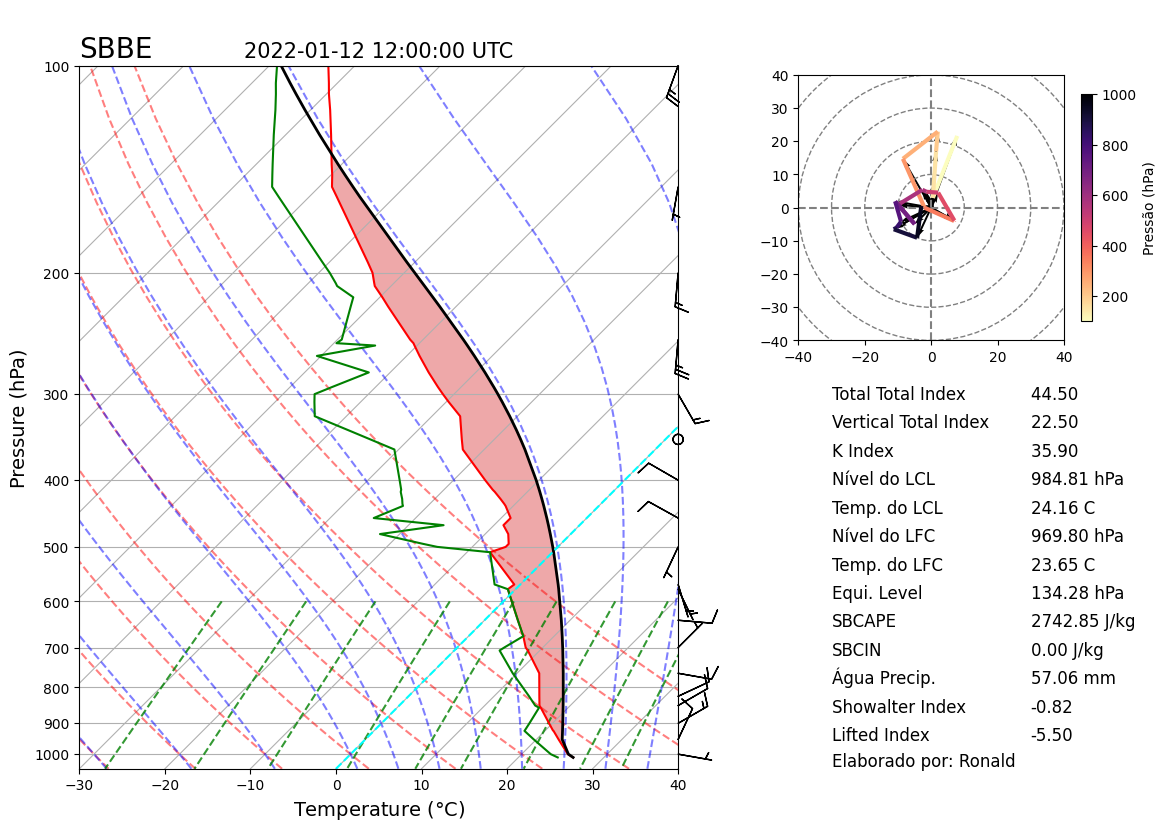

In [ ]:
# plotar skewt-logp com a função

# Escrever o nome da sua pasta
Autor = input("Escrever seu nome:")
print('                              ')
ano = int(input("Escrever o ano:"))
print('                              ')
mes = int(input("Escrever o mês:"))
print('                              ')
dia = int(input("Escrever o dia:"))
print('                              ')
hora = int(input("Escrever a hora:"))
print('                              ')
print('Elegir o tipo de código:')
print(" - OACI (e.g. SBBE (Belém)")
print(" - SYNOP (e.g. 84628 (Lima - Peru)")
codigo = input("Escrever o tipo de código: ")
if codigo == "OACI":
  estacao = input("Escrever o nome da estação " + f"({codigo}): ")
if codigo == "SYNOP":
  estacao = int(input("Escrever o nome da estação " f"({codigo}): "))
print('------------------------------------------------------------------------')

skewt_logp(WyomingUpperAir.request_data(datetime(year = ano, month = mes, day = dia, hour = hora), estacao), Autor)

# Material Suplementário

# Criando uma função para diferentes tipos de dados:

#- Casos com dados no repositório online de Wyoming.
#- Através de um arquivo .txt ou csv.
#- Apartir de dados NetCDF

In [ ]:
def skewt_logp(ds, year, month, day, hour, station:str, your_name:str, cloud=True, file=False, model=False):

  if cloud == True:
    # Eliminando valores NaN
    ds = ds.dropna()
    # Registrando unidades
    pressure = ds['pressure'].values * units('hPa')
    temperature = ds['temperature'].values * units('celsius')
    dewpoint = ds['dewpoint'].values * units('celsius')
    u_wind = ds['u_wind'].values * units('knot')
    v_wind = ds['v_wind'].values * units ('knot')
    # Para crear el título del gráfico
    name = ds['station'][0]
    time = ds['time'][0]

  if file == True:
    # Eliminando valores NaN
    ds = ds.dropna()
    # Registrando unidades
    pressure = ds['PRES'].values * units('hPa')
    temperature = ds['TEMP'].values * units('celsius')
    dewpoint = ds['DWPT'].values * units('celsius')
    u_wind, v_wind = mpcalc.wind_components(ds['SKNT'].values * units('knot'), ds['DRCT'].values * units('degrees'))
    # Para crear el título del gráfico
    name = station
    time = f'{year}-{month}-{day} {hour}:00:00 UTC'

  if model == True:
    # Registrando unidades
    pressure = (ds['level'].values * units('hPa'))[::-1]
    temperature = ((ds['t'].values - 273.15) * units('celsius'))[::-1]
    relative_humidity = (ds['r'].values * units('%'))[::-1]
    dewpoint = mpcalc.dewpoint_from_relative_humidity(temperature, relative_humidity)
    u_wind = (ds['u'].values * 2 * units('knot'))[::-1]
    v_wind = (ds['v'].values * 2 * units('knot'))[::-1]
    # Para crear el título del gráfico
    name = station
    time = f'{year}-{month}-{day} {hour}:00:00 UTC'

  # Configurar los níveles de presión
  levels = np.arange(100,1050,50) * units('hPa') # mbar para unidades en milibar
  levels = mpcalc.resample_nn_1d(pressure, levels)

  lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
  lfc_pressure, lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)
  el_pressure, el_temperature = mpcalc.el(pressure, temperature, dewpoint)
  sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)
  precipitable_water = mpcalc.precipitable_water(pressure, dewpoint)
  showalter = mpcalc.showalter_index(pressure, temperature, dewpoint)
  lifted = mpcalc.lifted_index(pressure, temperature, dewpoint)
  k_index = mpcalc.k_index(pressure, temperature, dewpoint)
  vt = mpcalc.vertical_totals(pressure, temperature)
  ct = mpcalc.cross_totals(pressure, temperature, dewpoint)
  tt = mpcalc.total_totals_index(pressure, temperature, dewpoint)

  # Creando la figura con el diagrama Skew-T Log-P
  fig = plt.figure(figsize = (10,10))

  # Utilizando la función gridspec para configura el gráfico
  gs = gridspec.GridSpec(3,3)
  skew = SkewT(fig, rotation = 45, subplot = gs[0:2, :2])

  # Temperaturas e viento(barbas)
  skew.plot(pressure, temperature, color = 'red')
  skew.plot(pressure, dewpoint, color = 'green')
  skew.plot_barbs(pressure[levels], u_wind[levels], v_wind[levels], flip_barb = True)

  # Adicionar las curvas de las adiabáticas y razón de mistura en el Skew-T Log-P
  skew.plot_dry_adiabats()
  skew.plot_moist_adiabats()
  skew.plot_mixing_lines()

  # Calcular el perfil vertical de la parcela de aire
  perfil = mpcalc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')
  skew.plot(pressure, perfil, color = 'black', linewidth = 2)

  # Cálculo del CAPE y CIN
  skew.shade_cin(pressure, temperature, perfil, dewpoint)
  skew.shade_cape(pressure, temperature, perfil)

  # Diferenciar la isoterma de 0ºC
  skew.ax.axvline(0, color = 'cyan', linestyle = '--')

  # Ajustar el diagrama Skew-T Log-P
  skew.ax.set_xlim(-30,40)

  # Formateando los ejes del título
  plt.xlabel(r'Temperature ($\degree$C)', fontsize = 14)
  plt.ylabel(r'Pressure (hPa)', fontsize = 14)
  plt.title(f'{name}', fontsize = 20, loc = 'left')
  plt.title(f'{time} UTC', fontsize = 15, loc = 'center')

  # -------------------------------------------------------------------------------------------
  # HODÓGRAFA

  # Agregar hodógrafa
  ax = fig.add_subplot(gs[0:1, 2])
  hodografo = Hodograph(ax, component_range=80.)
  hodografo.add_grid(increment=10)
  #hodografo.wind_vectors(u_wind[levels], v_wind[levels])
  hodografo.plot(u_wind[levels], v_wind[levels])
  niveis_cores = hodografo.plot_colormapped(u_wind[levels], v_wind[levels], pressure[levels], cmap='magma_r')

  # Agregar barra de colores para los niveles del viento
  fig.colorbar(niveis_cores, orientation='vertical', label='Pressão (hPa)', shrink = 0.8)

  # Agregar límites en el eje X y el eje Y
  ax.set_xlim(-40, 40)
  ax.set_ylim(-40, 40)

  # --------------------------------------------------------------------------------------------
  # ADICIONAR LOS PARÁMETROS TERMODINÁMICOS

  # Agregar parámetros termodinámicos
  ax3 = fig.add_subplot(gs[1, 2])
  ax3.axis('off')

  # columna 1
  ax3.text(0.1, 1.4,' ', size = 12)
  ax3.text(0.1, 1.3,'Total Total Index', size = 12)
  #ax3.text(0.1, 1.3,'Cross Total Index', size = 12)
  ax3.text(0.1, 1.2,'Vertical Total Index', size = 12)
  ax3.text(0.1, 1.1,'K Index', size = 12)
  ax3.text(0.1, 1,'Nivel do LCL', size = 12)
  ax3.text(0.1, 0.9,'Temp. do LCL', size = 12)
  ax3.text(0.1, 0.8,'Nivel do LFC', size = 12)
  ax3.text(0.1, 0.7,'Temp. do LFC', size = 12)
  ax3.text(0.1, 0.6,'Equi. Level', size = 12)
  ax3.text(0.1, 0.5,'SBCAPE', size = 12)
  ax3.text(0.1, 0.4,'SBCIN', size = 12)
  ax3.text(0.1, 0.3,'Agua Precip.', size = 12)
  ax3.text(0.1, 0.2,'Showalter Index', size = 12)
  ax3.text(0.1, 0.1,'Lifted Index', size = 12)

  # columna 2
  ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(tt)), size = 12)
  #ax3.text(0.7, 1.3, '{:.2f} '.format(np.array(ct)), size = 12)
  ax3.text(0.7, 1.2, '{:.2f} '.format(np.array(vt)), size = 12)
  ax3.text(0.7, 1.1, '{:.2f} '.format(np.array(k_index)), size = 12)
  ax3.text(0.7, 1, '{:.2f} hPa'.format(np.array(lcl_pressure)), size = 12)
  ax3.text(0.7, 0.9, '{:.2f} C'.format(np.array(lcl_temperature)), size = 12)
  ax3.text(0.7, 0.8, '{:.2f} hPa'.format(np.array(lfc_pressure)), size = 12)
  ax3.text(0.7, 0.7, '{:.2f} C'.format(np.array(lfc_temperature)), size = 12)
  ax3.text(0.7, 0.6, '{:.2f} hPa'.format(np.array(el_pressure)), size = 12)
  ax3.text(0.7, 0.5, '{:.2f} J/kg'.format(np.array(sbcape)), size = 12)
  ax3.text(0.7, 0.4, '{:.2f} J/kg'.format(np.array(sbcin)), size = 12)
  ax3.text(0.7, 0.3, '{:.2f} mm'.format(np.array(precipitable_water)), size = 12)
  ax3.text(0.7, 0.2, '{:.2f}'.format(np.array(showalter)[0]), size = 12)
  ax3.text(0.7, 0.1, '{:.2f}'.format(np.array(lifted)[0]), size = 12)
  ax3.text(0.1, 0.01, 'Elaborado por: ' + f'{your_name}', size = 12)

  plt.tight_layout()
  plt.show()

# **1- Dados obtidos desde o repositório online de Wyoming**

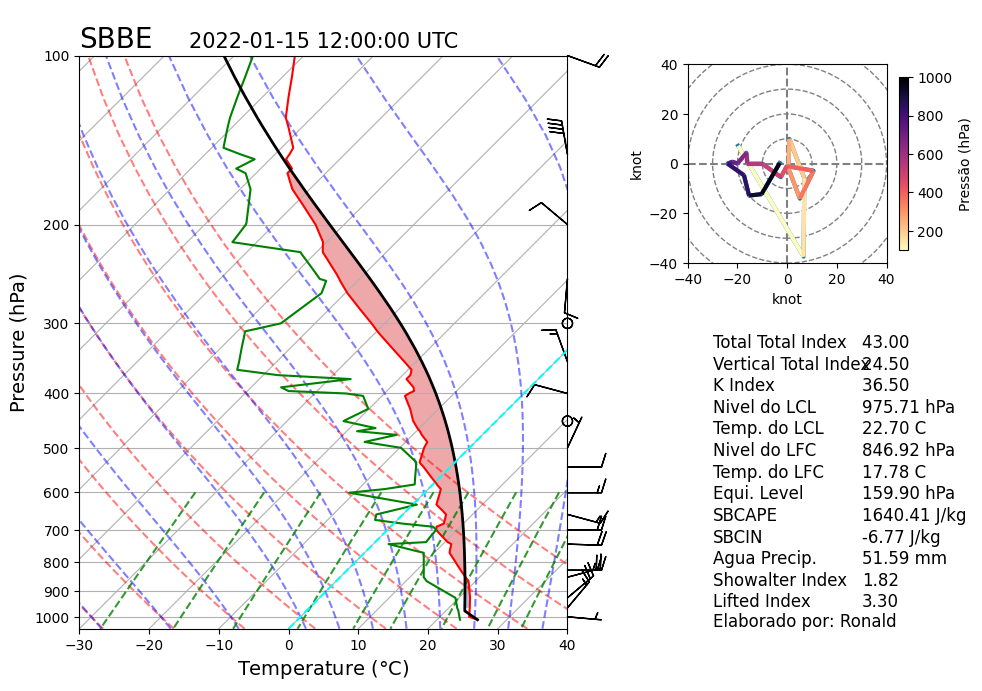

In [ ]:
# Extracción de datos del repositorio en la nube
ds = WyomingUpperAir.request_data(datetime(year=2022, month=1, day=15, hour=12), 'SBBE')

# Elaboración del diagrama termodinámico
diagrama = skewt_logp(ds, 2022,1,15,12,'SBBE','Ronald', cloud=True, file=False, model=False)

# **2- Dados obtidos através de um arquivo .txt ou .csv**

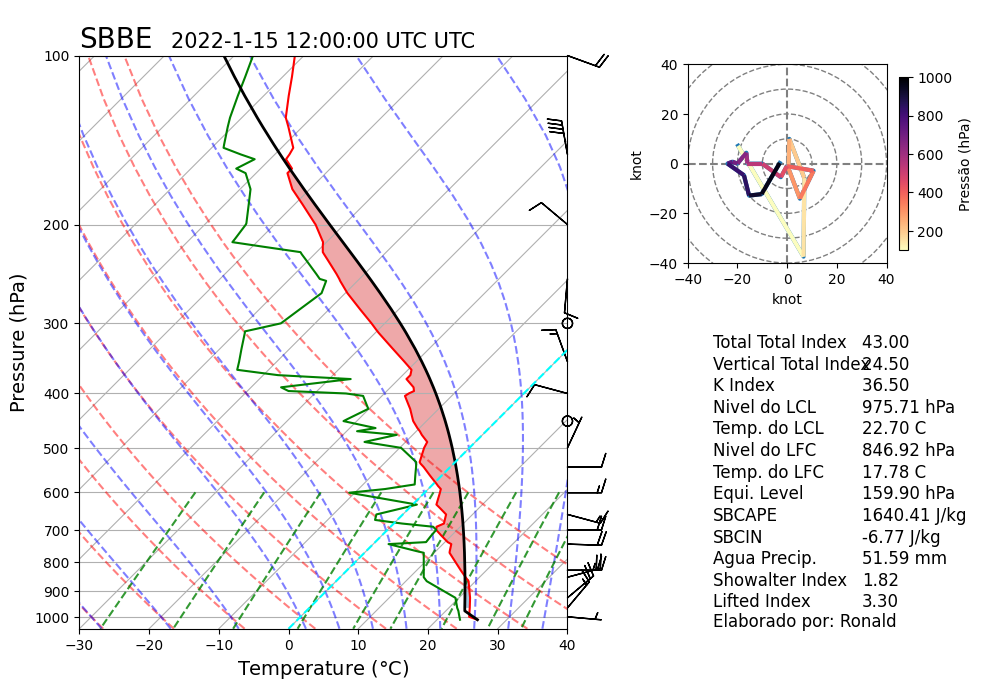

In [ ]:
# Importar a livraria pandas
import pandas as pd

# Abrir el archivo .txt
datos = pd.read_csv('/content/drive/MyDrive/USP-CURSOS/MONITORIA/Meteorologia-Sinotica-I/Aula-3/University_of_Wyoming-Radiosonde_Data.txt', header=None)
datos = datos.drop(datos.index[np.arange(0,5,1)])
datos = datos.drop(datos.index[[1,2]])
datos = datos.drop(datos.index[np.arange(120,176,1)])
# Creando los encabezados del DataFrame
headers = datos.iloc[0]
# Almacenando los valores numéricos del sondeo en un DataFrame
df = pd.DataFrame(datos.values[1:], columns = headers)
# Guardando los datos en un archivo .csv
df.to_csv('radiosondaje.csv')
# Abrir o arquivo .csv com os dados da radiosondagem salvador
ds = pd.read_csv('radiosondaje.csv', delimiter='\s+')
# Remover a primeira coluna que não apresenta dados de nosso interesse.
ds = ds.drop(ds.columns[[0]], axis = 'columns')
# Eliminando os dados faltantes do DataFrame <- NaN
ds = ds.dropna()

# Elaboración del diagrama termodinámico
diagrama = skewt_logp(ds, 2022,1,15,12,'SBBE','Ronald', cloud=False, file=True, model=False)

# **3- Dados obtidos através de um arquivo NetCDF**

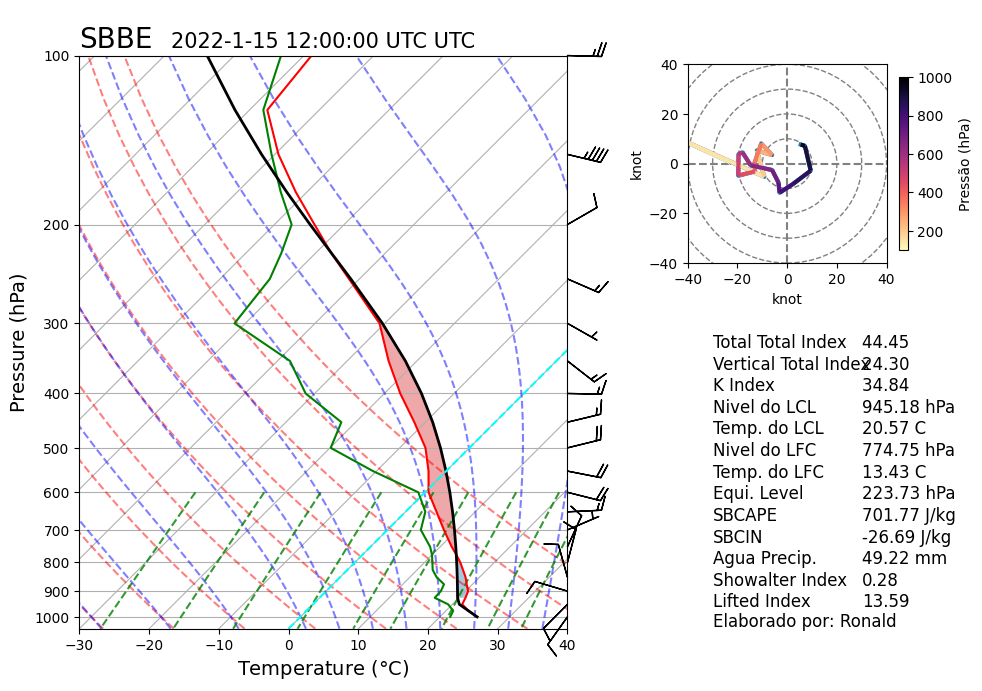

In [ ]:
# Importar la libreria
import xarray as xr

# Abrir el archivo NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/USP-CURSOS/MONITORIA/Meteorologia-Sinotica-I/Aula-3/era5-202201151200UTC.nc')
# Extraer el punto más cercano a la estación de Belén - SBBE
ds = ds.sel(latitude = -1.38, longitude = -48.48, method = 'nearest')
# Seleccionar un tiempo
ds = ds.isel(time=0)

# Elaborar el diagrama termodinámico
diagrama = skewt_logp(ds, 2022,1,15,12,'SBBE','Ronald', cloud=False, file=False, model=True)